# Confidence Intervals and Hypothesis Testing

## Contents
- [Imports](#section1)
- [Review of Sampling Distribution](#section2)
- [Confidence intervals](#section3)
    - [Confidence intervals for population means](#subsection3.1)
    - [Confidence intervals for population proportions](#subsection3.2)
    - [Summary](#subsection3.3)
- [Hypothesis testing](#section4)
    - [Introduction to hypothesis testing](#subsection4.1)
    - [Steps of the hypothesis testing](#subsection4.2)

## Imports  <a id="section1"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t

## Review of Sampling Distributions <a id="section2"></a>

<div class="alert alert-block alert-danger">
<b>Notes: The Central Limit Theorem (CLT): </b>  
    For a relatively large sample size, the random variable $\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$ is approximately normally distributed, regardless of the distribution of the population. The approximation becomes better with increased sample size. 
</div>

Because the random variable $\bar{X}$ approximately follows a normal distribution, so we are interested in the parameters of the distribution$-$mean and variance:

\begin{align}
&\mathbb{E}(\bar{X}) = \mathbb{E}\left(\frac{1}{n}\sum\limits_{i=1}^nX_i\right) = \frac{1}{n}\sum\limits_{i=1}^n\mathbb{E}(X_i) = \frac{1}{n}\sum\limits_{i=1}^n\mu = \mu, \\
&\text{Var}(\bar{X}) = \text{Var}\left(\frac{1}{n}\sum\limits_{i=1}^nX_i\right) = \frac{1}{n^2}\sum\limits_{i=1}^n\text{Var}(X_i) = \frac{1}{n^2}n\sigma^2 = \frac{\sigma^2}{n},
\end{align}

where $\mu$ and $\sigma^2$ are the mean and variance of the population, respectively. In this case, the sample mean $\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$ is a **point estimate** of the population mean $\mu$, or our "best guess" for the population parameter based on the sample data. 

## Confidence intervals <a id="section3"></a>
From the previous lecture, we learned that although the sample is less costly and can be done more quickly, a certain amount of error$-$called **sampling error**$-$will result due to the randomness in sampling. As a result, besides the point estimate, we may be more interested in a **confidence interval**, which provides a range of plausible values for the unknown population parameter (such as the mean). The probability, or confidence that the parameter lies in the confidence interval (i.e., that the confidence interval contains the parameter), is called the **confidence level**, denoted by $1-\alpha$ in this lecture. If $1-\alpha=95\%$, for instance, we are $95\%$ confident that the true population parameter lies within the confidence interval.

The equation of the confidence interval can be generalized as
$$
\text{estimate}\pm \text{margin of error}
$$
where expressions of the "estimate" and the "margin of error" may vary in different cases.

### Confidence intervals for population means <a id="subsection3.1"></a>
#### When the population standard deviation $\sigma$ is known
From the previous lectures, we learned that
1. The expectation of the sample mean $\bar{X}=\sum_{i=1}^nX_i$ is the same as the population mean $\mu$.
2. The estimate $\bar{X}$ has the standard deviation to be $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the population standard deviation. 
3. According to the CLT, the point estimate $\bar{X}$ approximately follows a normal distribution. 

As a result, $\bar{X}$ follows a normal distribution $N(\mu, \sigma^2/n)$. We then consider the **z-value**, or **z-score**, that standardizes the random variable $\bar{X}$:
\begin{align}
Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim N(0, 1).
\end{align}

The z-score variable follows a **standard normal distribution**, and we can then construct an interval of $z$ that covers a probability of $1−\alpha$, as illustrated below.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/z_alpha_2.png?raw=true">

The graph shows that both tails (red regions) have a probability of $\alpha/2$, and the cut-off value for the right tail can be written as $z_{\alpha/2}$, or the $(1-\alpha/2)$th percentile of the standard normal distribution. Due to the symmetry of the standard normal distribution function, we have the cut-off value of the left tail to be $-z_{\alpha/2}$. Therefore the interval can be written as $-z_{\alpha/2}\leq z \leq z_{\alpha/2}$. The confidence interval can be thus derived from this inequality

\begin{align}
&-z_{\alpha/2}\leq Z \leq z_{\alpha/2} \\
\Rightarrow &-z_{\alpha/2} \leq \frac{\bar{X}-\mu}{\sigma /\sqrt{n}} \leq z_{\alpha/2} \\
\Rightarrow &\bar{X} - z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} + z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}},  
\end{align}

so the confidence interval is $\bar{X}\pm z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}}$, with the estimate to be $\bar{X}$, and the margin of error to be $z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$.

<div class="alert alert-block alert-success">
<b>Example 1:</b> Consider the dataset "bulb.csv" as the population, a sample with $n=25$ records is randomly selected to infer the population mean. Assuming that the population standard deviation $\sigma$ is known, calculate the confidence interval with the confidence level to be $1-\alpha=95\%$.  
</div>

The following code cell reads the population data from the file.

In [3]:
data = pd.read_csv('bulb.csv')      # Read the data 
population = data['Lifespan']
sigma = population.values.std()     # The population standard deviation sigma is known
print(f'The population standard deviation: {sigma}')

The population standard deviation: 25.437524255752564


Then a sample of $n=25$ records is randomly selected from the population data.

In [4]:
n = 25                                          # Sample size n=25
sample = population.sample(n=25, replace=True)  # Random selection of a sample

Based on the sample data, we can calculate the confidence interval using the code segment below.

In [5]:
estimate = sample.mean()                        # Sample mean as the estimate    

alpha = 0.05                                    # Confidence level 1-alpha = 0.95
z_alpha2 = norm.ppf(1-alpha/2)                  # (1-alpha/2)th percentile
moe = z_alpha2 * sigma/n**0.5                   # Margin of error 

lower = estimate - moe                          # Lower bound of the CI        
upper = estimate + moe                          # Upper bound of the CI

print(f'Estimate: {estimate}')            
print(f'CI: [{lower}, {upper}]')  

Estimate: 1351.151046979958
CI: [1341.1797207005302, 1361.1223732593858]


Please note that the confidence interval is also random, in the sense that it varies with the randomly selected sample. However, no matter how the confidence interval changes, the true population mean value (given below) *almost* always falls in the interval.

In [6]:
mean_pop = population.mean()
print('Population mean: {0:0.2f}'.format(mean_pop))   

Population mean: 1351.24


We can repeat the sampling experiment by 1000 times using the `for`-loop below.

In [7]:
lowers = []
uppers = []
repeats = 1000

alpha=0.05
z_alpha2 = norm.ppf(1-alpha/2)

for i in range(repeats):
    sample = population.sample(n=25, replace=True)
    estimate = sample.mean()
    moe = z_alpha2 * sigma/n**0.5
    
    lowers.append(estimate - moe)
    uppers.append(estimate + moe)
    
conf_int = pd.DataFrame({'lower': lowers,
                         'upper': uppers})
conf_int

,lower,upper
0,1338.333826,1358.276478
1,1339.816679,1359.759331
2,1345.166472,1365.109125
3,1343.026259,1362.968911
4,1339.294283,1359.236936
...,...,...
995,1330.435795,1350.378447
996,1340.575684,1360.518337
997,1345.361721,1365.304374
998,1335.065555,1355.008208


Among the 1000 experiments, the chance that the population mean value $\mu$ falls between the confidence intervals is around $1-\alpha = 95\%$.

In [8]:
cond1 = mean_pop >= conf_int['lower']
cond2 = mean_pop <= conf_int['upper']
prob = (cond1 & cond2).mean()

print(f'The probability is {prob}')

The probability is 0.946


You may also go to the [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) website (**Topic: Confidence Intervals and Hypothesis Testing**) to conduct the similar experiments.

#### When the population standard deviation $\sigma$ is unknown
Notice that in **Example 1**, the population standard deviation $\sigma$ is a known parameter. This population information, however, is typically unknown in practical data analysis. The following discussion focuses on the derivation of the confidence interval from the sample data only, with no knowledge on the population standard deviation $\sigma$.

In cases where the population standard deviation $\sigma$ is unknown, the best we can do is to estimate the population standard deviation, $\sigma$, by the **sample standard deviation** $s$, expressed as
$$
s = \sqrt{\frac{\sum\limits_{i=1}^n(X_i-\bar{X})^2}{n-1}}. 
$$
Please note that the denominator of the expression is $n-1$ instead of $n$, and an intuitive explanation is given [here](https://www.youtube.com/watch?v=wpY9o_OyxoQ). In Python, the sample standard deviation can be calculated by the method `std()` of pandas series or data frames. For NumPy arrays, we need to specify the keyword argument `ddof=1` when calling the `std()` method.

The standard deviation term $\frac{\sigma}{\sqrt{n}}$ of the sample mean $\bar{X}$ is therefore replaced by the **standard error** term $\frac{s}{\sqrt{n}}$. Similar to the standardized $z$-value in the prior cases, we can derive the so called $\pmb{t}$**-value** such that
$$
T = \frac{\bar{X} - \mu}{s/\sqrt{n}}, 
$$
as the **standardized version** of $\bar{X}$. Unlike the $z$-value, the $t$-value does not follow a standard normal distribution. Instead, it follows a Student's $t$-distribution, with the degree of freedom specified to be $n-1$. A comparison between the standard normal and a few $t$-distributions are provided in the [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) website (**Topic: Confidence Intervals and Hypothesis Testing**).

Our observations from the figure above are:
1. All $t$-curves have a symmetric bell-shape resembling the standard normal curve. 
2. The difference from the standard normal distribution is that the $t$-curves have more spread than the standard normal distribution. This is because substituting the estimate $s$ (which is uncertain) for the fixed parameter $\sigma$ introduces more variation. 
3. As the degrees of freedom $n-1$ increase, the $t$-curves approaches the standard normal curve because $s$ estimates $\sigma$ more precisely as the sample size $n$ becomes larger. The $t$ curve would be nearly the same as the standard normal curve under very large sample size $n$.

Compared with the cases that the population standard deviation $\sigma$ is known, if $\sigma$ is unknown, the differences:
1. The population standard deviation $\sigma$ in all equations are replaced by the sample standard deviation $s$;
2. All calculations are based on the sample information, and no population information, such as $\sigma$, is involved;
3. The standardized $t$-value follows a $t$-distribution, instead of the standard normal distribution.

Similar to the previous case, the confidence interval can be derived as

$$
\begin{align}
&-z_{\alpha/2}\leq T \leq z_{\alpha/2} \\
\Rightarrow &-t_{\alpha/2} \leq \frac{\bar{X}-\mu}{s /\sqrt{n}} \leq t_{\alpha/2} \\
\Rightarrow &\bar{X} - t_{\alpha/2}\cdot \frac{s}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2}\cdot \frac{s}{\sqrt{n}},  
\end{align}
$$

where $t_{\alpha/2}$ is the $(1-\alpha/2)$th percentile of the $t$-distribution, so the confidence interval is written as $\bar{X}\pm t_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$, where $\bar{X}$ is the estimate, $t_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$ is the margin of error. 

<div class="alert alert-block alert-success">
<b>Example 2:</b> Consider the dataset "bulb.csv" as the population, a sample with $n=25$ records is randomly selected to infer the population mean. Now the population standard deviation $\sigma$ is unknown, calculate the confidence interval with the confidence level to be $1-\alpha=95\%$.  
</div>

A random sample is selected first.

In [9]:
n = 25                                          # Sample size n=25
sample = population.sample(n=25, replace=True)  # Random selection of a sample

Then based on the sample, the confidence interval is calculated.

In [10]:
estimate = sample.mean()                        # Sample mean as the estimate    

alpha = 0.05                                    # Confidence level 1-alpha = 0.95
t_alpha2 = t.ppf(1-alpha/2, n-1)                # (1-alpha/2)th percentile
s = sample.std()                                # Sample standard deviation
moe = t_alpha2 * s/n**0.5                       # Margin of error 

lower = estimate - moe                          # Lower bound of the CI        
upper = estimate + moe                          # Upper bound of the CI

print(f'Estimate: {estimate}')            
print(f'CI: [{lower}, {upper}]')  

Estimate: 1344.2588148601403
CI: [1331.88546365805, 1356.6321660622307]


### Confidence intervals for population proportions <a id="subsection3.2"></a>
In some statistical studies, we are interested in population proportions, such as:
1. The proportion of Singapore customers who prefer Coke over Pepsi.
2. The proportion of US voters who support Trump. 
3. The fatality rate of COVID-19.

In this section, we will focus on inferring such population proportions based on sample data. Similar to the cases of inferring the population means, we will start with the sampling distribution of the estimate. 

#### Sampling distribution for the population proportion
<div class="alert alert-block alert-success">
<b>Example 3:</b> It is assumed that in Singapore, $p = 73\%$ of customers prefer Coke over Pepsi. We are conducting $n$ surveys to investigate customers' preference, and among these surveys, $m$ people choose Coke. Plot the sampling distributions of the <b>sample proportion</b> $\hat{p}=m/n$ under different sample sizes $n=5, 10, 50, 100$.
</div>

Note that in the expression of the sample proportion, $m$ is a random variable following a binomial distribution $B(n, p)$, so the sample distribution can be derived from the PMF of the binomial variable, as follows.

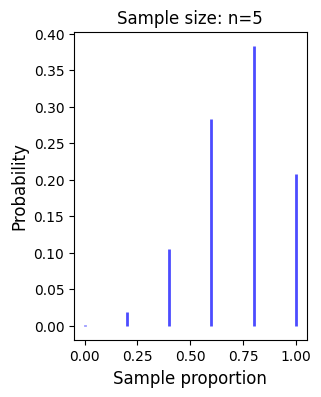

In [11]:
n = 5                                   # Sample size: n=5, 10, 50, or 100
p = 0.73                                # Population proportion p 

m = np.arange(n+1)                      # All possible outcomes of m
pmf = binom.pmf(m, n, p)                # Corresponding probabilities for all values of m
estimate = m/n                          # Corresponding sample proportions

plt.figure(figsize=(3, 4))
plt.vlines(estimate, ymin=0, ymax=pmf, 
           linewidth=2, colors='b', alpha=0.7)
plt.xlabel('Sample proportion', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title(f'Sample size: n={n}')
plt.show()

By varying the sample size $n$, we have the following observations:
1. The sampling distribution seems to be 'centered' at the true population proportion $p$.
2. The variation of the sampling distribution is reduced when the sample size increases.
3. The shape of the sample distribution approaches a normal distribution as the sample size increases. 

In fact, observations 1 and 2 can be proved mathematically:
\begin{align}
&\mathbb{E}\left(\hat{p}\right) = \mathbb{E}\left(\frac{m}{n}\right) = \frac{\mathbb{E}(m)}{n} = \frac{np}{n} = p \\
&\text{Var}\left(\hat{p}\right) = \text{Var}\left(\frac{m}{n}\right) = \frac{1}{n^2}\text{Var}(m) = \frac{1}{n^2}np(1-p) = \frac{p(1-p)}{n}.
\end{align}
This is because the random variable $m$ follows the binomial distribution $B(n, p)$, where its expectation is $np$. The expected value of the sample proportion $\hat{p}=m/n$ is thus the same as the population proportion $p$, so it looks 'centered' at the true population proportion $p$. The variance of $\hat{p}$ is $p(1-p)/n$, so the variation of $\hat{p}$ reduces when the the sample size $n$ increases.

These three observations tells us that the sample proportion $\hat{p}=m/n$ approximately follows a normal distribution $N(p, p(1-p)/n)$, this fact can help us to derive the confidence interval. Consider the standardized z-score
\begin{align}
Z = \frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}} \sim N(0, 1),
\end{align}
which follows a standard normal distribution, so similar to the population mean cases, we have
\begin{align}
&-z_{\alpha/2}\leq z \leq z_{\alpha/2} \\
\Rightarrow &-z_{\alpha/2} \leq \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}} \leq z_{\alpha/2} \\
\Rightarrow &\hat{p} - z_{\alpha/2}\cdot \sqrt{\frac{p(1-p)}{n}} \leq p \leq \hat{p} + z_{\alpha/2}\cdot \sqrt{\frac{p(1-p)}{n}}.  
\end{align}

This is not the confidence interval yet, because we still have the unknown population proportion $p$ in both sides of the expressions. We then replace the $p$ by the estimate $\hat{p}$, and the confidence interval can be written as
\begin{align}
\hat{p} - z_{\alpha/2}\cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq p \leq \hat{p} + z_{\alpha/2}\cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}},  
\end{align}
or $\hat{p} \pm z_{\alpha/2}\cdot \sqrt{\hat{p}(1-\hat{p})/n}$, where the "estimate" in the general formula is $\hat{p}$, and the margin of error is $z_{\alpha/2}\cdot \sqrt{\hat{p}(1-\hat{p})/n}$.

<div class="alert alert-block alert-success">
    <b>Example 4: </b>: Political polling is usually used to predict the results of an election. Typically, a poll of $n=1004$ people can be used to represent hundreds of million of voters across the country. Why such a small sample size is considered sufficient? How can we interpret the results?
</div>

We consider a confidence level of $1-\alpha=95\%$. Note that the margin of error is proportional to the standard deviation of $\hat{p}$, written as $\sqrt{\hat{p}(1-\hat{p})/n}$.

If the sample size $n=1004$ is fixed, the standard deviation term $\sqrt{\hat{p}(1-\hat{p})/n}$ is maximized when $\hat{p}=0.5$, the maximum margin of error can be thus calculated by the following code.

In [12]:
n = 1004                                    # Sample size n=1004
p_hat = 0.5                                 # p_hat that maximizes the standard deviation

alpha = 0.05                                # Alpha given in the confidence level 
z_alpha2 = norm.ppf(1-alpha/2)              # (1-alpha/2)th percentile
moe = z_alpha2 * (p_hat*(1-p_hat)/n)**0.5   # The margin of error

print(f'The margin of error: {moe}')

The margin of error: 0.03092795743287378


The results above show that with a poll sample of $1004$ potential voters, even under the worst scenario, we would still have a $95\%$ confidence that the true population proportion $p$ is within a $\pm 3\%$ interval centered at the estimate $\hat{p}$. Normally such an precision is considered sufficient. The beauty of this method, as you may noticed, is that the sample size is not affected by the size of the total population. For big countries like the USA or small countries like Singapore, the sample size could both be $1004$. 

An interactive data visualization is provided at the [Programming for Business Analytics](https://share.streamlit.io/xiongpengnus/learn_dao/main/web.py) website (**Topic: Confidence Intervals and Hypothesis Testing**) to illustrate how the sample size $n$ affect the margin of error, under different values of $p$. 

### Summary <a id="subsection3.3"></a>

|Parameter| Estimate | Margin of error | Remarks
|:-------|:---------|:--------|:---------
|Mean value $\mu$ | Sample average $\bar{X}$ | $z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$ if $\sigma$ is known<br>$t_{\alpha/2}\cdot\frac{s}{\sqrt{n}}$ if $\sigma$ is unknown | $t_{\alpha/2}$ can be replaced by $z_{\alpha/2}$<br>for very large $n$.
|Proportion $p$ | Sample proportion $\hat{p}$ | $$z_{\alpha/2}\cdot\sqrt{\hat{p}(1-\hat{p})/n}$$| - |


Equations of confidence intervals in various situations are also summarized at the [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) website (**Topic: Confidence Intervals and Hypothesis Testing**).

## Hypothesis testing <a id="section4"></a>

### Introduction to hypothesis testing <a id="subsection4.1"></a>
We often use inferential statistics to make decisions or judgments on the value of a parameter. For example, we might need to know 
1. Whether the mean lifespan of bulbs in a batch is longer than 1350 hours.
2. If the mortality rate of a disease is lower than $1\%$. 

One commonly used method for proving/disproving such theories is to perform a **hypothesis test**. A ***hypothesis*** is a statement that something is true. For example, the statement that "The mortality rate of a disease is lower than $1\%$" is a hypothesis.

Typically, a hypothesis test involves two hypotheses: the **null hypothesis** and the **alternative hypothesis (or research hypothesis)**.

<div class="alert alert-block alert-danger">
<b>Notes: </b>
    <li> The <b>null hypothesis</b> is usually the current thinking, or status quo, denoted by $H_0$ 
    <li> The <b>alternative (research) hypothesis</b>, denoted by $H_a$, is a hypothesis considered to be the alternative to the null hypothesis. It is usually the hypothesis a researcher wants to prove. The burden of proof is on the alternative hypothesis. 
    <li> <b>Hypothesis test</b>: the problem to decide whether the null hypothesis should be rejected in favor of the alternative hypothesis.
</div>

<div class="alert alert-block alert-danger">
<b>Notes: Basic Logic of Hypothesis Testing: </b> Take a random sample from the population. If the sample data are consistent with the null hypothesis, do not reject the null hypothesis; if the sample data are inconsistent with the null hypothesis and supportive of the alternative hypothesis, reject the null hypothesis in favor of the alternative hypothesis.
</div>

Our next question is how to determine if the sample data are consistent with the null hypothesis. This is answered by comparing the sample data with the sampling distribution of the estimator while assuming the null hypothesis is true. If according to the sampling distribution, we find the sample data are very unlikely to occur, then we may conclude that the sample data do not support the null hypothesis and we thus reject it. 

### Steps of the hypothesis testing <a id="subsection4.2"></a>

Specifically, the hypothesis tests can be conducted following the steps below.

#### Hypotheses

The choice of the alternative hypothesis is crucial for a hypothesis test. Based on the theory we are aimed to prove, there are three different choices.
1. If the primary concern is to decide whether a population mean, $\mu$, is different from a given constant value $\mu_0$, we express the alternative hypothesis as 
$$
H_a:~\mu\not=\mu_0
$$
This hypothesis suggests that $\mu$ is either larger or smaller than the constant $\mu_0$, so such a test is called a **two-tailed test**, where $\mu$ could vary from $\mu_0$ in two directions.

2. If the primary concern is deciding whether a population proportion, $\mu$, is less than a given constant value $\mu_0$, we express the alternative hypothesis as
$$
H_a:~\mu < \mu_0
$$
In this case, $\mu$ is smaller than $\mu_0$, or in other words, the test checks if $\mu$ is on the left-hand-side of $\mu_0$, so it is called a **left-tailed test**.

2. If the primary concern is deciding whether a population proportion, $\mu$, is greater than a given constant value $\mu_0$, we express the alternative hypothesis as
$$
H_a:~\mu > \mu_0
$$
In this case, $\mu$ is greater than $\mu_0$, or in other words, the test checks if $\mu$ is on the right-hand-side of $\mu_0$, so it is called a **right-tailed test**.

Please note that hypotheses always refer to population parameters, such as $\mu$. The three types of tests also applied to population proportions. 

#### Sampling distributions
The sampling distribution is used to determine if the sample data are consistent with the null hypothesis. From previous sections, we learned that the sampling distribution may vary in different cases:
- Null hypothesis assumes the population mean $\mu=\mu_0$
    - When the population standard deviation is known to be $\sigma$, we choose the $\pmb{z}$**-test** model (standard normal distribution):
    $$
    z=\frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}} \sim N(0,~1)
    $$
    - When the population standard deviation is unknown, then the sample standard deviation $s$ is used, and we choose the $\pmb{t}$**-test** model (Student's $t$-distribution):
    $$
    t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}} \sim t\text{-distribution with }n-1\text{ degree of freedom}
    $$
- Null hypothesis assumes the population proportion $p=p_0$, we choose the $\pmb{z}$**-test** model (standard normal distribution):
$$
z=\frac{\hat{p} - p_0}{\sqrt{p_0(1-p_0)/n}} \sim N(0,~1)
$$

#### Significance from $P$-values

<div class="alert alert-block alert-danger">
    <b>$P$-Value</b>: The $P$-value of a hypothesis test is the probability of getting sample data at least as inconsistent with the null hypothesis (and supportive of the alternative hypothesis) as the sample data actually obtained.
</div>

Based on the type of hypothesis tests (which side), we can calculate the $P$-value as the following graph. 

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/p_values_test_types.png?raw=true">

#### Conclusions
Given a significant level $\alpha$, we draw conclusions from the $P$-value:
- We reject the null hypothesis $H_0$ in favor of the alternative hypothesis, if the $P$-value is **lower** than the selected significance level $\alpha$;
- Otherwise, we do not reject the null hypothesis.

<div class="alert alert-block alert-success">
<b>Example 5:</b> We randomly select a sample with $n=25$ records from the "bulb.csv" dataset. Based on the sample data and given the significance level $\alpha=5\%$, can we conclude that the mean lifespan of all bulbs in this batch is longer than 1340 hours? 
</div>

In [13]:
data = pd.read_csv('bulb.csv')      
population = data['Lifespan']

n = 25
sample = population.sample(n, replace=True)

In this example, we will go through all components of hypothesis testing. 

**1. Hypotheses**
In this case, we need to prove that the population mean is larger than a given value, so it is a right tailed test. 

\begin{align}
\text{Null hypothesis: }H_0: \mu \leq \mu_0=1340 \\
\text{Alternative hypothesis: }H_a: \mu > \mu_0=1340
\end{align}

**2. Sampling distribution**
We standardize the estimate $\bar{x}$ to achieve the $t$-value
\begin{align}
t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}},
\end{align}
which follows the Student's $t$-distribution, with the degree of freedom to be $n-1$.


In [14]:
estimate = sample.mean()
s = sample.std()
mu0 = 1340

t_value = (estimate - mu0) / (s/n**0.5)

**3. Significance from $P$-value**

The $P$-value for the right tailed test can be calculated by the following code cell.

In [15]:
p_value = 1 - t.cdf(t_value, n-1)           # Right tailed region of the t-distribution 
print(f'P-value: {p_value}')

P-value: 0.004449616167427339


**4. Conclusions**

From the previous steps, we found the $P$-value smaller than the given significance level $\alpha=0.05$ (The $P$-value depends on the random sample, so occasionally, it could be above $\alpha=0.05$). As a result, we could reject the null hypothesis in favor of the alternative hypothesis. In other words, we may conclude that the mean lifespan is longer than 1340 hours. 

Finally, a summary of conducting hypothesis testing is provided at the [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) website (**Topic: Confidence Intervals and Hypothesis Testing**).